###### logistic regression is used to solve two class classification problem
###### log(p/1-p) = m1x1+m2x2...+c

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\projects\machine learning\DataScience\Dataset\Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [4]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.shape()

TypeError: 'tuple' object is not callable

In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

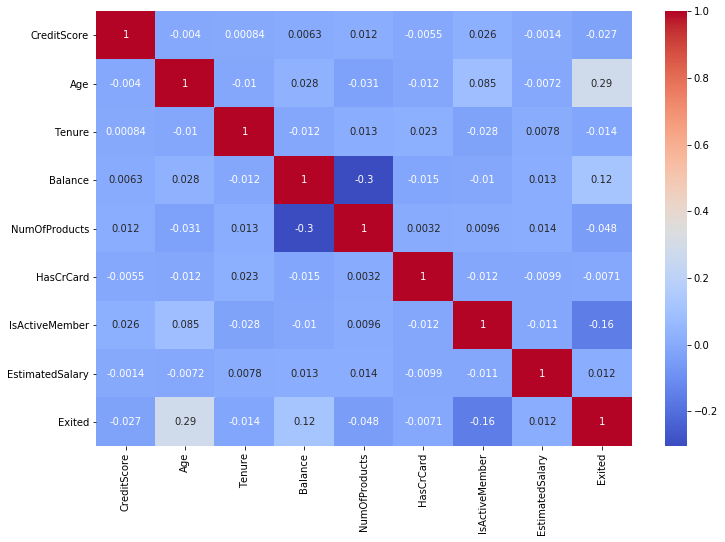

In [13]:
cor=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [15]:
#anova
nums=['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary']
xd=df[nums]
yd=df['Exited']
from sklearn.feature_selection import f_classif
fsc,p = f_classif(xd,yd)
for i in range(len(nums)):
    print(nums[i],p[i])

CreditScore 0.006738213892258643
Age 1.2399313093415039e-186
Tenure 0.1615268494952801
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.22644042802376574


In [16]:
#chi square
cats = ['Geography', 'Gender','HasCrCard', 'IsActiveMember']
xd = df[cats]
yd = df['Exited']
from sklearn.preprocessing import LabelEncoder 
xd['Geography'] = LabelEncoder().fit_transform(xd['Geography'])
xd['Gender'] = LabelEncoder().fit_transform(xd['Gender'])

from sklearn.feature_selection import chi2
fs,ps = chi2(xd,yd)
for i in range(len(cats)):
    print(cats[i],ps[i])


Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.5680362405434552e-27


d:\anaconda\envs\home\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\anaconda\envs\home\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [31]:
x = df[['CreditScore', 'Age','Balance','Geography', 'Gender', 'IsActiveMember','NumOfProducts']]
y = df['Exited']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

transformer = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[3,4]),('sc',StandardScaler(),[0,1,2,6])],remainder='passthrough')
transformer.fit(x)
x2 = transformer.transform(x)
print(x2.shape)

(10000, 8)


In [32]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.2,random_state=5)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtr,ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Performance Analysis

In [34]:
x.columns

Index(['CreditScore', 'Age', 'Balance', 'Geography', 'Gender',
       'IsActiveMember', 'NumOfProducts'],
      dtype='object')

In [35]:
new_customer = [[730,64,124335,'Germany','Male',1,0]]
new_customer = transformer.transform(new_customer)
model.predict(new_customer)

array([1], dtype=int64)

In [36]:
ypred = model.predict(xts)

from sklearn import metrics
metrics.accuracy_score(yts,ypred)

0.8095

In [37]:
metrics.recall_score(yts,ypred) #therefore the logistic model has only 19% of business accuracy and cannot be used

0.19012345679012346

In [38]:
metrics.precision_score(yts,ypred)

0.5923076923076923

In [39]:
metrics.f1_score(yts,ypred) # 28% is the actual accuracy

0.28785046728971964